#Project pertama Data Science terapan IDC
nama : Novianto

Link dashboard

https://public.tableau.com/views/ProjectpertamaDSTerapan/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link


#Business Understanting

Jaya Jaya Maju merupakan salah satu perusahaan multinasional yang telah berdiri sejak tahun 2000. Ia memiliki lebih dari 1000 karyawan yang tersebar di seluruh penjuru negeri. Walaupun telah menjadi menjadi perusahaan yang cukup besar, Jaya Jaya Maju masih cukup kesulitan dalam mengelola karyawan. Hal ini berimbas tingginya attrition rate (rasio jumlah karyawan yang keluar dengan total karyawan keseluruhan) hingga lebih dari 10%.






###Business problem

Dari latar belakang tersebut pertanyaan yang diajukan dalam project ini adalah

1.   Faktor apa yang mempengaruhi attririon


###Project Scope

Untuk menjawab permasalah bisnis tersebut maka aktivitas dalam project ini meliput:

1.   Pemahaman data untuk menjelaskan secara deskripsi data
2.   Menemukan faktor yang mempengaruhi attrition





###Persiapan
untuk menjelakan project ini, data yang diperlukan diambil dari case dicoding yang diberikan dengan akses berikut: https://github.com/dicodingacademy/dicoding_dataset/tree/main/employee

Untuk olah data, project ini menggunakan Google Colab dengan pemrograman pyton.

Hasil olah data ditampilkan dalam dashboard

# 1. Pemahaman Data

pada bagian ini akan dilakukan untuk menjelaskan data makna dalam dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

hr_df = pd.read_csv(
    "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv",
    encoding='windows-1252'
)
hr_df.head(5)

EmployeeId  Age  Attrition     BusinessTravel  DailyRate  \
0           1   38        NaN  Travel_Frequently       1444   
1           2   37        1.0      Travel_Rarely       1141   
2           3   51        1.0      Travel_Rarely       1323   
3           4   42        0.0  Travel_Frequently        555   
4           5   40        NaN      Travel_Rarely       1194   

               Department  DistanceFromHome  Education EducationField  \
0         Human Resources                 1          4          Other   
1  Research & Development                11          2        Medical   
2  Research & Development                 4          4  Life Sciences   
3                   Sales                26          3      Marketing   
4  Research & Development                 2          4        Medical   

   EmployeeCount  ...  RelationshipSatisfaction StandardHours  \
0              1  ...                         2            80   
1              1  ...                         1            80   
2              1  ...                         3            80   
3              1  ...                         4            80   
4              1  ...                         2            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 1                  7                      2               3   
1                 0                 15                      2               1   
2                 3                 18                      2               4   
3                 1                 23                      2               4   
4                 3                 20                      2               3   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                  2                        1   
1               1                  0                        0   
2              10                  0                        2   
3              20                  4                        4   
4               5                  3                        0   

   YearsWithCurrManager  
0                     2  
1                     0  
2                     7  
3                     8  
4                     2  

[5 rows x 35 columns]

In [2]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [3]:
hr_df.isna().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
dtype: int64

Berikut adalah arti dari masing-masing elemen dalam hasil data:

1. **Total 35 kolom** – Data memiliki 35 variabel yang menggambarkan berbagai aspek dari karyawan.
2. **Non-Null Count** – Menunjukkan jumlah entri yang tidak kosong dalam setiap kolom. Misalnya, kolom *Attrition* hanya memiliki 1058 entri, yang berarti ada beberapa nilai yang hilang (missing values) sebanyak 412.
3. **Dtype** – Menunjukkan tipe data dari setiap kolom:
   - **int64** → Bilangan bulat (integer)
   - **float64** → Bilangan desimal (floating point)
   - **object** → Data kategori atau teks

Berikut beberapa variabel utama dan artinya:
- **EmployeeId** → ID unik untuk setiap karyawan.
- **Age** → Usia karyawan.
- **Attrition** → Indikator apakah karyawan telah keluar dari perusahaan (1 untuk keluar, 0 untuk tetap).
- **BusinessTravel** → Kategori perjalanan bisnis yang dilakukan karyawan.
- **DailyRate & MonthlyRate** → Gaji harian dan bulanan karyawan.
- **Department** → Departemen tempat karyawan bekerja (misalnya HR, R&D, Sales).
- **DistanceFromHome** → Jarak rumah ke kantor.
- **Education & EducationField** → Tingkat pendidikan dan bidang studi karyawan.
- **EnvironmentSatisfaction** → Kepuasan karyawan terhadap lingkungan kerja.
- **JobInvolvement & JobSatisfaction** → Seberapa terlibat dan puas karyawan dalam pekerjaannya.
- **MonthlyIncome** → Pendapatan bulanan karyawan.
- **OverTime** → Apakah karyawan bekerja lembur atau tidak.
- **PerformanceRating** → Rating kinerja karyawan.
- **WorkLifeBalance** → Indikator keseimbangan kehidupan kerja karyawan.
- **YearsAtCompany & YearsInCurrentRole** → Lama bekerja di perusahaan dan dalam peran saat ini.
- **YearsSinceLastPromotion** → Waktu sejak promosi terakhir.


##1.2. Eksplorasi data
Pada bagian ini visualisasi data dilakukan untuk memberikan gambaran tentang data.

Untuk mempermudah pemahaman data maka data project diarahkan pada beberapa variabel.


In [4]:
# memilih variabel utama untuk analisa lebih lanjut
selected_columns = [
    'EmployeeId', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
    'MonthlyRate', 'Department', 'DistanceFromHome', 'Education',
    'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement',
    'JobSatisfaction', 'MonthlyIncome', 'OverTime', 'PerformanceRating',
    'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'JobLevel'
]

new_df = hr_df[selected_columns]

In [5]:
new_df.head(5)

EmployeeId  Age  Attrition     BusinessTravel  DailyRate  MonthlyRate  \
0           1   38        NaN  Travel_Frequently       1444         5224   
1           2   37        1.0      Travel_Rarely       1141        14382   
2           3   51        1.0      Travel_Rarely       1323        10332   
3           4   42        0.0  Travel_Frequently        555        14864   
4           5   40        NaN      Travel_Rarely       1194        12549   

               Department  DistanceFromHome  Education EducationField  ...  \
0         Human Resources                 1          4          Other  ...   
1  Research & Development                11          2        Medical  ...   
2  Research & Development                 4          4  Life Sciences  ...   
3                   Sales                26          3      Marketing  ...   
4  Research & Development                 2          4        Medical  ...   

   JobInvolvement  JobSatisfaction  MonthlyIncome  OverTime PerformanceRating  \
0               3                2           2991       Yes                 3   
1               1                2           4777        No                 3   
2               3                3           2461       Yes                 3   
3               3                2          13525        No                 3   
4               3                3           2001        No                 3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                3               6                   2   
1                1               1                   0   
2                4              10                   0   
3                4              20                   4   
4                3               5                   3   

   YearsSinceLastPromotion  JobLevel  
0                        1         1  
1                        0         2  
2                        2         1  
3                        4         4  
4                        0         1  

[5 rows x 21 columns]

In [6]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeId               1470 non-null   int64  
 1   Age                      1470 non-null   int64  
 2   Attrition                1058 non-null   float64
 3   BusinessTravel           1470 non-null   object 
 4   DailyRate                1470 non-null   int64  
 5   MonthlyRate              1470 non-null   int64  
 6   Department               1470 non-null   object 
 7   DistanceFromHome         1470 non-null   int64  
 8   Education                1470 non-null   int64  
 9   EducationField           1470 non-null   object 
 10  EnvironmentSatisfaction  1470 non-null   int64  
 11  JobInvolvement           1470 non-null   int64  
 12  JobSatisfaction          1470 non-null   int64  
 13  MonthlyIncome            1470 non-null   int64  
 14  OverTime                

In [7]:
new_df.describe(include='all')

EmployeeId          Age    Attrition BusinessTravel    DailyRate  \
count   1470.000000  1470.000000  1058.000000           1470  1470.000000   
unique          NaN          NaN          NaN              3          NaN   
top             NaN          NaN          NaN  Travel_Rarely          NaN   
freq            NaN          NaN          NaN           1043          NaN   
mean     735.500000    36.923810     0.169187            NaN   802.485714   
std      424.496761     9.135373     0.375094            NaN   403.509100   
min        1.000000    18.000000     0.000000            NaN   102.000000   
25%      368.250000    30.000000     0.000000            NaN   465.000000   
50%      735.500000    36.000000     0.000000            NaN   802.000000   
75%     1102.750000    43.000000     0.000000            NaN  1157.000000   
max     1470.000000    60.000000     1.000000            NaN  1499.000000   

         MonthlyRate              Department  DistanceFromHome    Education  \
count    1470.000000                    1470       1470.000000  1470.000000   
unique           NaN                       3               NaN          NaN   
top              NaN  Research & Development               NaN          NaN   
freq             NaN                     961               NaN          NaN   
mean    14313.103401                     NaN          9.192517     2.912925   
std      7117.786044                     NaN          8.106864     1.024165   
min      2094.000000                     NaN          1.000000     1.000000   
25%      8047.000000                     NaN          2.000000     2.000000   
50%     14235.500000                     NaN          7.000000     3.000000   
75%     20461.500000                     NaN         14.000000     4.000000   
max     26999.000000                     NaN         29.000000     5.000000   

       EducationField  ...  JobInvolvement  JobSatisfaction  MonthlyIncome  \
count            1470  ...     1470.000000      1470.000000    1470.000000   
unique              6  ...             NaN              NaN            NaN   
top     Life Sciences  ...             NaN              NaN            NaN   
freq              606  ...             NaN              NaN            NaN   
mean              NaN  ...        2.729932         2.728571    6502.931293   
std               NaN  ...        0.711561         1.102846    4707.956783   
min               NaN  ...        1.000000         1.000000    1009.000000   
25%               NaN  ...        2.000000         2.000000    2911.000000   
50%               NaN  ...        3.000000         3.000000    4919.000000   
75%               NaN  ...        3.000000         4.000000    8379.000000   
max               NaN  ...        4.000000         4.000000   19999.000000   

        OverTime PerformanceRating  WorkLifeBalance  YearsAtCompany  \
count       1470       1470.000000      1470.000000     1470.000000   
unique         2               NaN              NaN             NaN   
top           No               NaN              NaN             NaN   
freq        1054               NaN              NaN             NaN   
mean         NaN          3.153741         2.761224        7.008163   
std          NaN          0.360824         0.706476        6.126525   
min          NaN          3.000000         1.000000        0.000000   
25%          NaN          3.000000         2.000000        3.000000   
50%          NaN          3.000000         3.000000        5.000000   
75%          NaN          3.000000         3.000000        9.000000   
max          NaN          4.000000         4.000000       40.000000   

        YearsInCurrentRole  YearsSinceLastPromotion     JobLevel  
count          1470.000000              1470.000000  1470.000000  
unique                 NaN                      NaN          NaN  
top                    NaN                      NaN          NaN  
freq                   NaN                      NaN          NaN  
mean      

Berdasarkan data statistik yang diberikan, berikut beberapa temuan menarik:

### 1️⃣ **Karakteristik Karyawan**
- **Usia rata-rata** adalah sekitar **36,9 tahun**, dengan rentang usia dari **18 hingga 60 tahun**.
- **Jumlah tahun bekerja di perusahaan** memiliki rata-rata **7 tahun**, tetapi ada karyawan yang sudah bekerja hingga **40 tahun**.
- **Rata-rata tahun dalam peran saat ini** adalah sekitar **4,2 tahun**, menunjukkan adanya stabilitas dalam posisi pekerjaan.

### 2️⃣ **Kesejahteraan & Kepuasan**
- **Keseimbangan kehidupan kerja** memiliki nilai rata-rata **2,72**, menunjukkan bahwa beberapa karyawan mungkin mengalami tantangan dalam menyeimbangkan pekerjaan dan kehidupan pribadi.
- **Kepuasan pekerjaan** memiliki distribusi yang cukup luas, dari **1 (sangat tidak puas) hingga 4 (sangat puas)**, dengan median sekitar **3**.
- **Kepuasan lingkungan kerja** juga bervariasi, dengan angka tertinggi mencapai **4**.

### 3️⃣ **Gaji dan Insentif**
- **Pendapatan bulanan rata-rata** adalah sekitar **14.313**, dengan nilai minimum **2094** dan maksimum **26.999**. Ini menunjukkan adanya kesenjangan yang cukup besar dalam distribusi gaji.
- **Karyawan dengan opsi saham** tampaknya memiliki beberapa tingkatan berbeda, meskipun ini tidak dijelaskan dalam data.
- **Peningkatan gaji tahunan** memiliki nilai rata-rata **2,91%**, yang mungkin mempengaruhi kepuasan dan motivasi kerja.

### 4️⃣ **Perjalanan Bisnis & Departemen**
- **Mayoritas karyawan jarang melakukan perjalanan bisnis** (*Travel_Rarely* muncul sebanyak **1043 kali**).
- **Departemen terbesar adalah Research & Development**, yang memiliki **961 karyawan** dibandingkan departemen lain seperti Sales atau HR.

### 5️⃣ **Promosi & Rotasi**
- **Rata-rata waktu sejak promosi terakhir** adalah sekitar **7 tahun**, dengan beberapa karyawan yang belum mendapatkan promosi selama **40 tahun**.
- **Beberapa karyawan tidak mengalami perpindahan perusahaan**, tetapi ada yang memiliki pengalaman bekerja di beberapa perusahaan sebelum ini.

### **Kesimpulan**
Data ini menunjukkan pola yang menarik terkait kepuasan kerja, keseimbangan kehidupan kerja, serta struktur gaji dan perjalanan bisnis. Jika dianalisis lebih lanjut, mungkin bisa ditemukan hubungan antara kepuasan kerja dan faktor-faktor seperti **gaji, perjalanan bisnis, atau kesempatan promosi**.


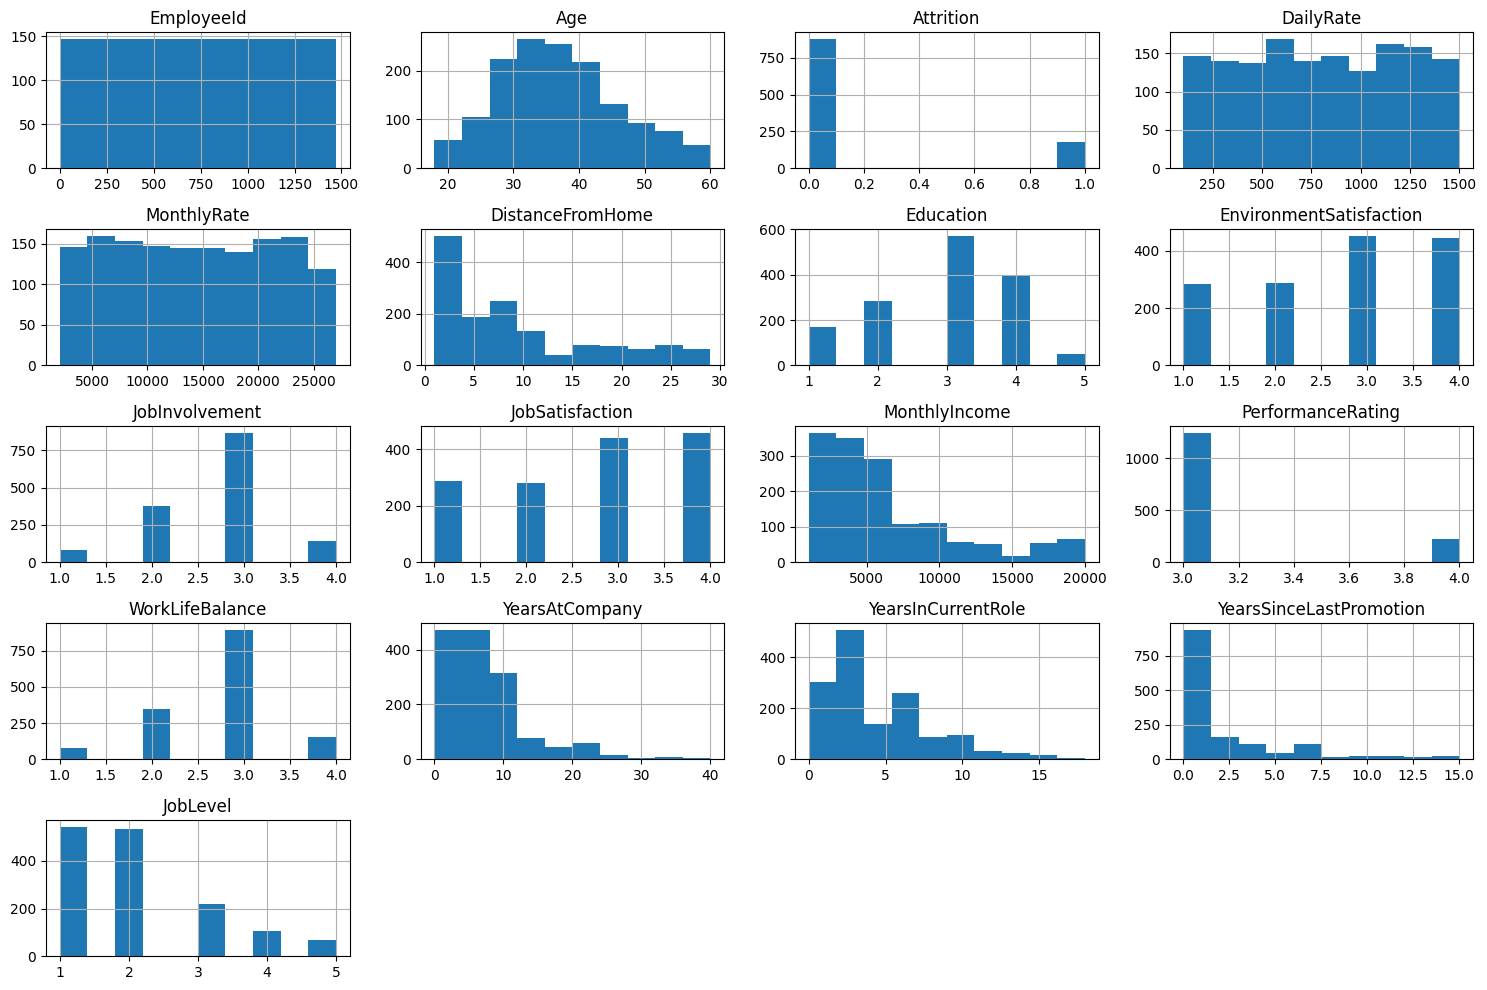

In [8]:

# Select numerical columns
numerical_cols = new_df.select_dtypes(include=[np.number]).columns

# Create histograms
new_df[numerical_cols].hist(figsize=(15, 10))  # Adjust figsize for better visualization
plt.tight_layout()
plt.show()

Hasil visualisasi histogram tesebut menunjukkan jumlah karyawan yang keluar lebih banyak dari yang masih bekerja.

Dominasi Karyawan Muda: Distribusi usia menunjukkan perusahaan memiliki banyak karyawan muda, yang mungkin berkaitan dengan tingginya attrition pada masa kerja awal.

Tingkat Attrition Tinggi di Awal Karir: Karyawan baru cenderung lebih sering mengundurkan diri, yang ditunjukkan oleh data years at company yang didominasi oleh pekerja dengan lama kerja 0-10 tahun

Kepuasan Sedang: Nilai kepuasan kerja dan lingkungan tidak terlalu tinggi (rata-rata 3.0–3.5), mengindikasikan perlunya perbaikan di area tertentu.

Keseimbangan Hidup-Kerja Cukup Baik: Meski tidak ideal, karyawan merasa cukup nyaman dengan keseimbangan ini.




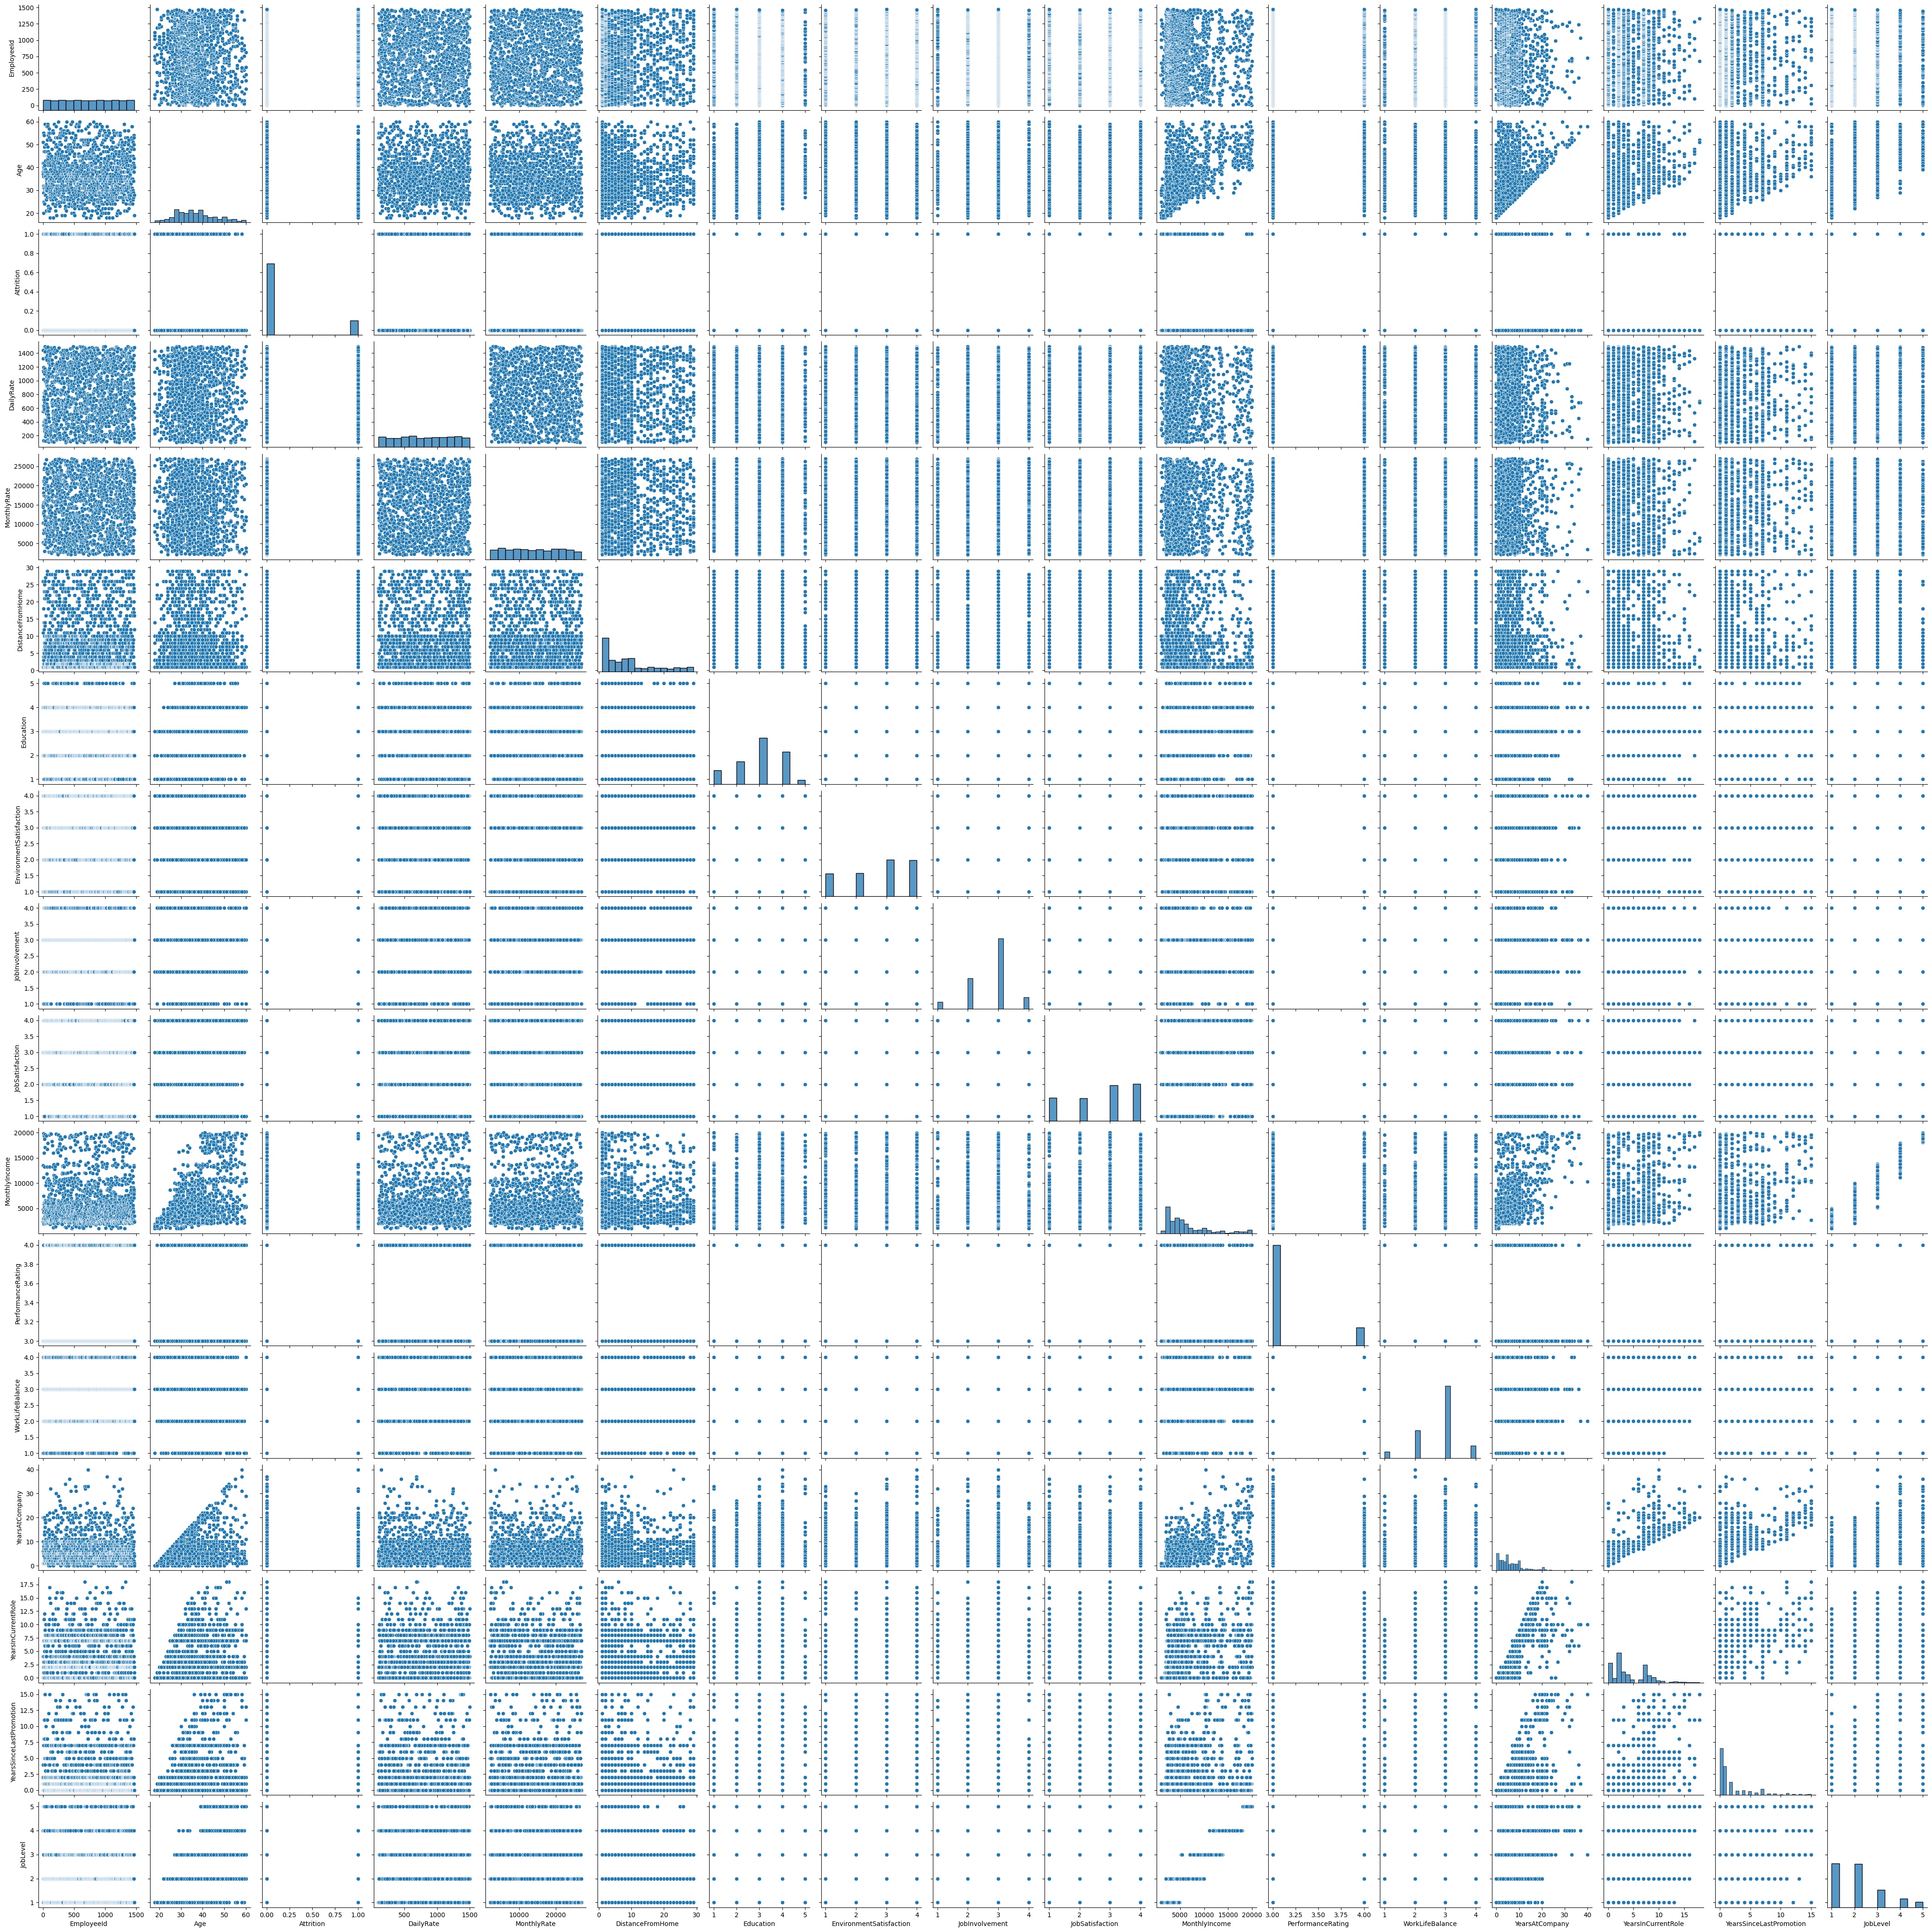

In [9]:
# Select numerical columns
numerical_cols = new_df.select_dtypes(include=['float64', 'int64']).columns

# Create the pair plot
sns.pairplot(new_df[numerical_cols])
plt.show()

Hasil visualisasi pairplot menunjukkan secara umum tidak ada gambar khusus yang meunjukkan pola pengaruh linear. Indikasi hanya pada variabel lama bekerja di perusahaan yearatthecompany.

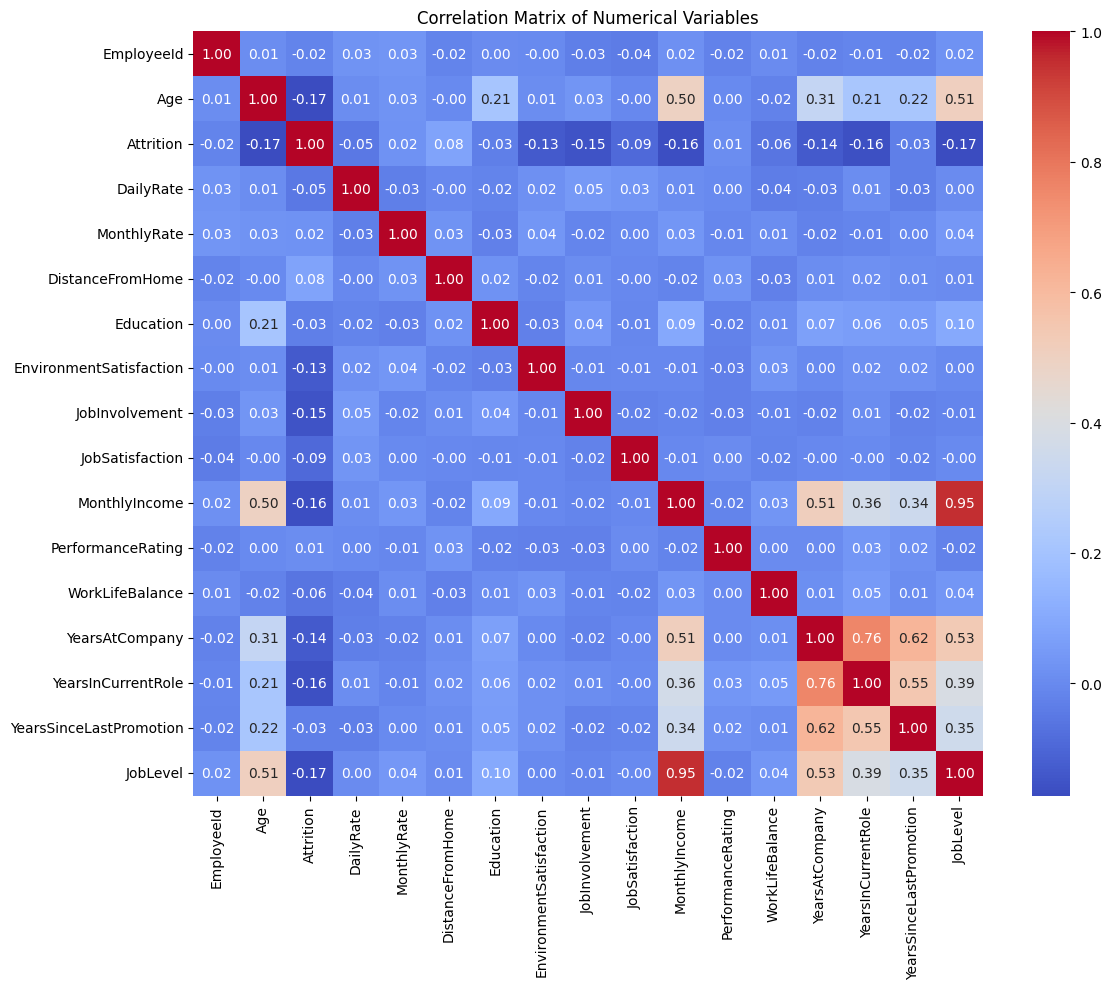

In [10]:
# Select numerical columns
numerical_cols = new_df.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix
correlation_matrix = new_df[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

Matriks korelasi menunjukkan hubungan linier antar variabel numerik dalam dataset karyawan. Nilai berkisar dari -1 (korelasi negatif sempurna) hingga 1 (korelasi positif sempurna). Nilai mendekati 0 menunjukkan tidak ada hubungan.
Beberapa pola penting yang teridentifikasi:

**Korelasi Signifikan**

Age (Usia) vs. MonthlyIncome (Pendapatan Bulanan) = Korelasi: 0.50. Interpretasi: Karyawan dengan usia lebih tinggi cenderung memiliki pendapatan lebih besar. Ini mungkin terkait pengalaman atau jenjang karir.

YearsAtCompany (Lama Bekerja) vs. YearsInCurrentRole (Lama di Posisi Saat Ini) = Korelasi: 0.76. Interpretasi: Hubungan sangat kuat. Karyawan yang lama di perusahaan cenderung menempati posisi yang sama dalam waktu panjang.

YearsAtCompany vs. MonthlyIncome = Korelasi: 0.51. Interpretasi: Karyawan dengan masa kerja panjang umumnya memiliki pendapatan lebih tinggi (efek kenaikan gaji tahunan/promosi).

Attrition (Pengunduran Diri) vs. Age = Korelasi: -0.17. Interpretasi: Karyawan muda lebih mungkin mengundurkan diri.

Attrition vs. MonthlyIncome = Korelasi: -0.16. Interpretasi: Karyawan dengan pendapatan rendah lebih rentan resign.

Attrition vs. MonthlyIncome = Korelasi: -0.16. Interpretasi: Karyawan dengan pendapatan rendah lebih rentan resign.

Attrition vs. Joblevel = Korelasi: -0.17. Interpretasi: Karyawan dengan posisi rendah lebih rentan resign.



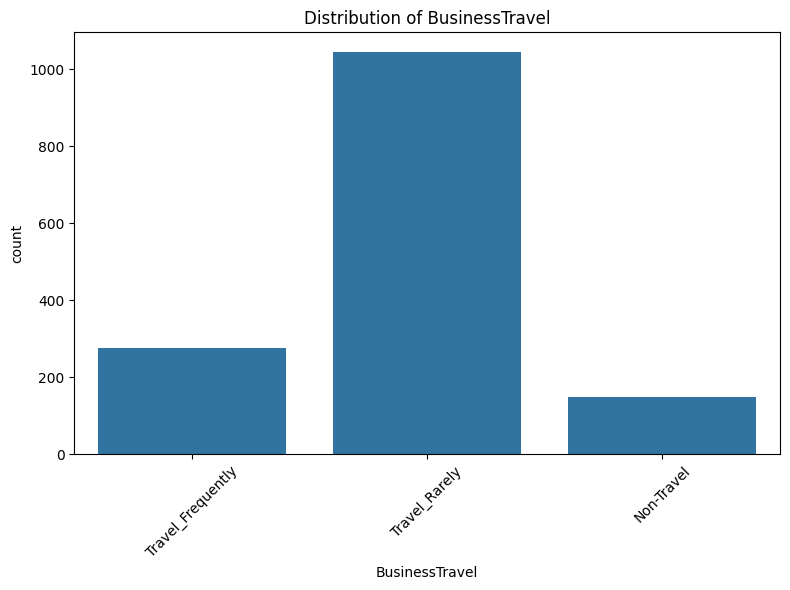

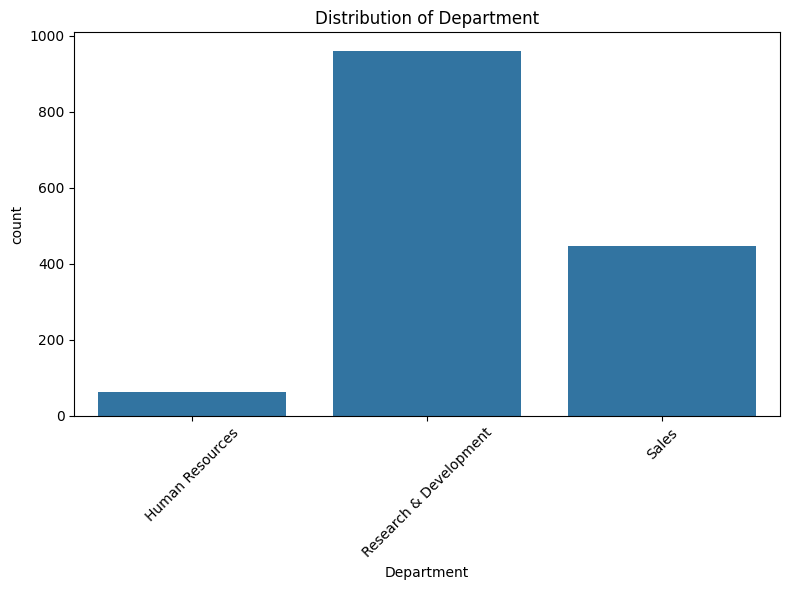

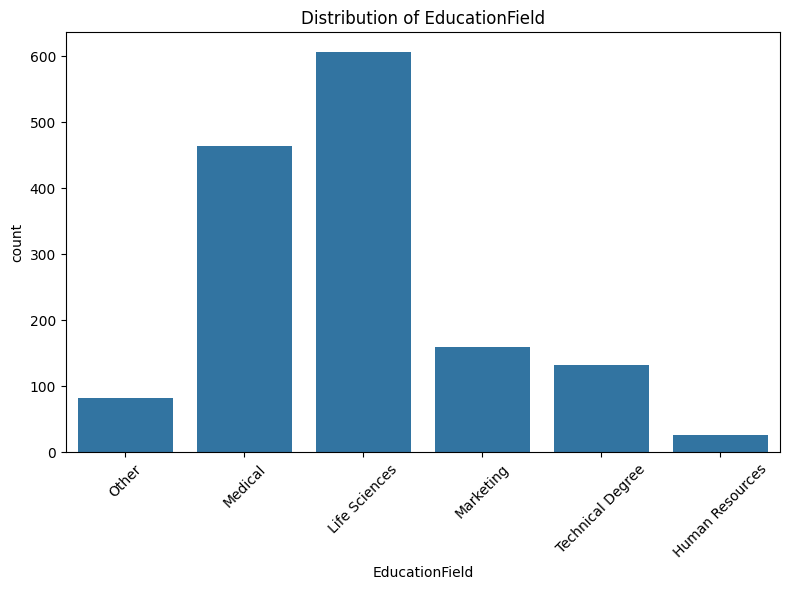

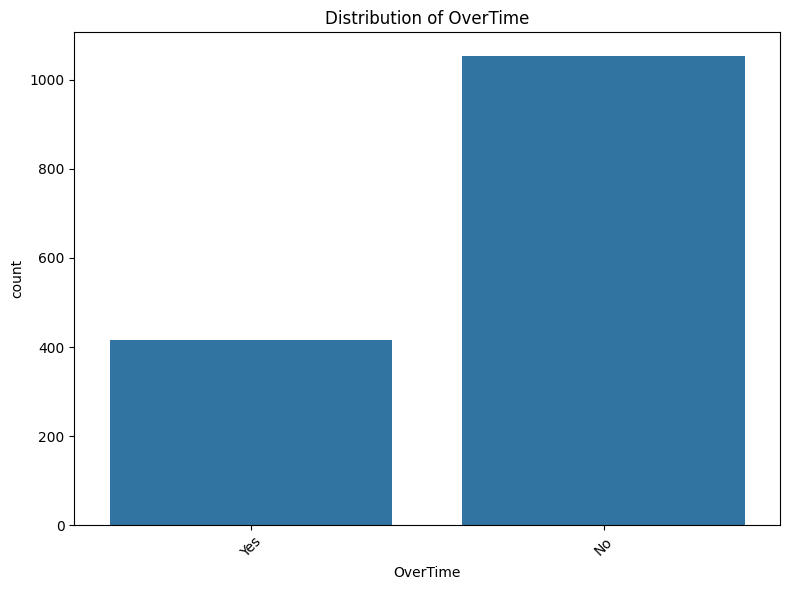

In [11]:


# Select categorical columns
categorical_cols = new_df.select_dtypes(include=['object']).columns

# Create bar charts for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.countplot(x=col, data=new_df)
    plt.title(f'Distribution of {col}')  # Set title for each chart
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

Data tersebut menjelaskan bahwa karyawan terbanyak adalah dari bagian RnD. Karyawan ini jarang melakukan perjalanan bisnis dan jarang untuk melakukan lebur.

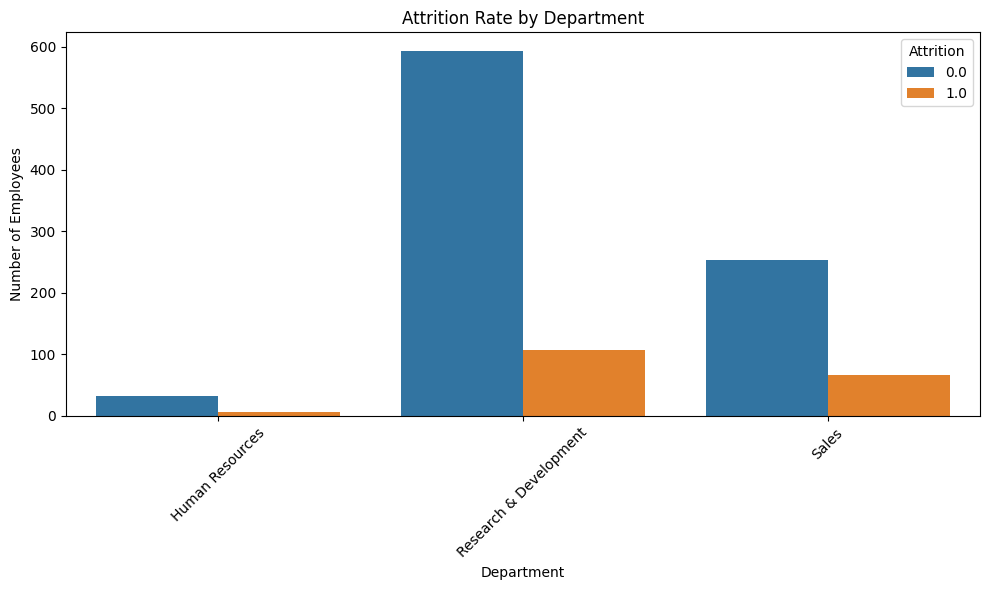

In [12]:
# Create a grouped bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=new_df)
plt.title('Attrition Rate by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Attrition', loc='upper right')
plt.tight_layout()
plt.show()

dari visualisasi tersebut, dapat dipahami bahwa karyawan di departemen RnD merupakan karwayan yang banyak mengundurkan diri.

# 2. Data Preperation

Pada tahap ini, olah data dilakukan untuk mempersiapkan data untuk modeling. Tahapan ini dilakukan dengan cara:
1. Melakukan perbaikan data,
2. Pembersihan data

Karena tipe data tidak memiliki masalah, maka data preparataion akan dilakukan dengan pembersihan data.

In [13]:
#dataset yang akan dibersihkan
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeId               1470 non-null   int64  
 1   Age                      1470 non-null   int64  
 2   Attrition                1058 non-null   float64
 3   BusinessTravel           1470 non-null   object 
 4   DailyRate                1470 non-null   int64  
 5   MonthlyRate              1470 non-null   int64  
 6   Department               1470 non-null   object 
 7   DistanceFromHome         1470 non-null   int64  
 8   Education                1470 non-null   int64  
 9   EducationField           1470 non-null   object 
 10  EnvironmentSatisfaction  1470 non-null   int64  
 11  JobInvolvement           1470 non-null   int64  
 12  JobSatisfaction          1470 non-null   int64  
 13  MonthlyIncome            1470 non-null   int64  
 14  OverTime                

In [14]:
# Remove rows with missing values in the 'Attrition' column
new_df_cleaned = new_df.dropna(subset=['Attrition'])

# Display the shape of the cleaned DataFrame
print(f"Shape of original DataFrame: {new_df.shape}")
print(f"Shape of cleaned DataFrame: {new_df_cleaned.shape}")

# Display the number of rows in the cleaned DataFrame
num_rows_cleaned = new_df_cleaned.shape[0]
print(f"Number of rows after removing NaN in 'Attrition': {num_rows_cleaned}")

Shape of original DataFrame: (1470, 21)
Shape of cleaned DataFrame: (1058, 21)
Number of rows after removing NaN in 'Attrition': 1058


In [15]:
new_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeId               1058 non-null   int64  
 1   Age                      1058 non-null   int64  
 2   Attrition                1058 non-null   float64
 3   BusinessTravel           1058 non-null   object 
 4   DailyRate                1058 non-null   int64  
 5   MonthlyRate              1058 non-null   int64  
 6   Department               1058 non-null   object 
 7   DistanceFromHome         1058 non-null   int64  
 8   Education                1058 non-null   int64  
 9   EducationField           1058 non-null   object 
 10  EnvironmentSatisfaction  1058 non-null   int64  
 11  JobInvolvement           1058 non-null   int64  
 12  JobSatisfaction          1058 non-null   int64  
 13  MonthlyIncome            1058 non-null   int64  
 14  OverTime                 1058

Pembersiah data dilakukan terhadap data data kosong atau missing value pada variabel attrition. Hasilnya adalah terdapat 1058 data yang siap untuk diolah lebih lanjut

In [16]:
# Calculate the percentage of attrition with value 1
attrition_1_percentage = (new_df_cleaned['Attrition'] == 1.0).sum() / len(new_df_cleaned) * 100
attrition_0_percentage = (new_df_cleaned['Attrition'] == 0.0).sum() / len(new_df_cleaned) * 100

# Print the percentage
print(f"Percentage of Attrition with value 1: {attrition_1_percentage:.2f}%")
print(f"Percentage of Attrition with value 0: {attrition_0_percentage:.2f}%")

Percentage of Attrition with value 1: 16.92%
Percentage of Attrition with value 0: 83.08%


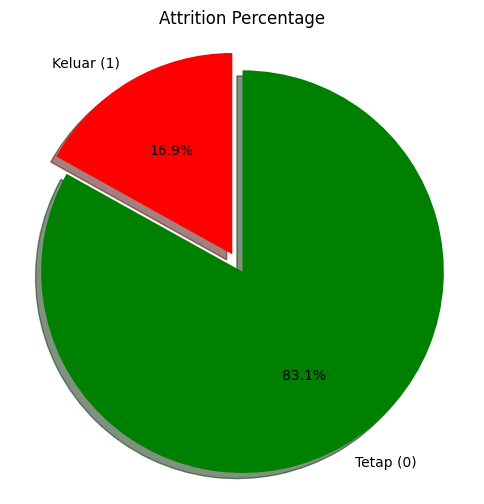

In [17]:
# Data for the pie chart
labels = ['Keluar (1)', 'Tetap (0)']
sizes = [attrition_1_percentage, attrition_0_percentage]
colors = ['red', 'green']  # You can customize the colors
explode = (0.1, 0)  # Explode the first slice (Attrition = 1)

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Attrition Percentage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Setelah data dibersihakn, maka dapat dihitung berapa persen karyawan yang tetap dan yang keluar. Nilai 1 untuk menunjukkan status karyawan yang sudah keluar dan nilai 0 menunjukkan karyawan yang masih bekerja. Hasil menunjukkan bahwa karyawan yang keluar adalah 16.9% dari keseluruhan karyawan.

# 3. Modeling

Pada bagian modeling, data akan disusun dalam model untuk dapat melihat faktor apa yang mempengaruhi attretion karyawan.

Untuk membuat model ini ditentukan variabel y adalah attrition, variabel x adalah semua variabel yang memiliki tipe data numeric. Model yang dengan bangun menggunakan **regresi logistik**.

Tujuan dari regresi ini adalah untuk melihat dampak bagaimana pengaruh faktor-faktor tersebut terhadap kemungkinan karyawan untuk keluar

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

numerical_cols = new_df_cleaned.select_dtypes(include=['int64', 'float64']).columns
X = new_df_cleaned[numerical_cols.drop('Attrition')]  # Drop 'Attrition' dari variabel X
y = new_df_cleaned['Attrition']

# Tambahkan konstanta untuk statsmodels
X_const = sm.add_constant(X)

# Model regresi logistik dengan statsmodels untuk melihat signifikansi
model = sm.Logit(y, X_const)
result = model.fit()

# Tampilkan ringkasan hasil regresi
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.391025
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1058
Model:                          Logit   Df Residuals:                     1041
Method:                           MLE   Df Model:                           16
Date:                Fri, 02 May 2025   Pseudo R-squ.:                  0.1398
Time:                        08:54:03   Log-Likelihood:                -413.70
converged:                       True   LL-Null:                       -480.96
Covariance Type:            nonrobust   LLR p-value:                 8.494e-21
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       4.6009      1.141      4.031      0.000       2.364   

Berikut adalah interpertasi dari hasil regresi logistik

| Variabel                  | Koefisien  | Arah Pengaruh          | Keterangan |
|---------------------------|------------|--------------------------|------------|
| Age                       | -0.0332    | Negatif                 | Semakin tua, semakin kecil kemungkinan keluar. |
| DistanceFromHome          | 0.0263     | Positif                 | Semakin jauh jarak dari rumah, semakin besar kemungkinan keluar. |
| EnvironmentSatisfaction   | -0.3395    | Negatif                 | Kepuasan lingkungan kerja menurunkan attrition. |
| JobInvolvement            | -0.5781    | Negatif                 | Keterlibatan kerja yang tinggi mengurangi attrition. |
| JobSatisfaction           | -0.2940    | Negatif                 | Kepuasan kerja menurunkan attrition. |
| WorkLifeBalance           | -0.2747    | Negatif                 | Keseimbangan hidup-kerja lebih baik mengurangi attrition. |
| YearsInCurrentRole        | -0.1403    | Negatif                 | Lama di posisi sekarang → lebih kecil kemungkinan keluar. |
| YearsSinceLastPromotion   | 0.1354     | Positif                 | Semakin lama sejak promosi terakhir → lebih besar kemungkinan keluar. |

**Makna temuan hasil**


Faktor uang (gaji, pendapatan harian/bulanan) tidak terbukti signifikan mempengaruhi attrition dalam model ini.

Faktor psikologis dan lingkungan kerja seperti JobSatisfaction, EnvironmentSatisfaction, dan JobInvolvement justru lebih kuat berpengaruh.

Hal ini menunjukkan bahwa untuk mengurangi attrition, perusahaan sebaiknya fokus pada peningkatan kepuasan kerja dan lingkungan kerja, bukan hanya menaikkan gaji.

Model

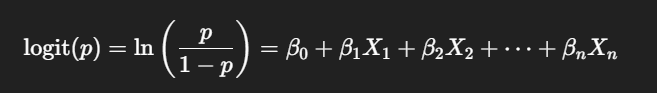


logit(p) = 4.6009 - 0.0332(Age) + 0.0263(DistanceFromHome) - 0.3395(EnvironmentSatisfaction) - 0.5781(JobInvolvement) - 0.2940(JobSatisfaction) - 0.2747(WorkLifeBalance) - 0.0156(YearsAtCompany) - 0.1403(YearsInCurrentRole) + 0.1354(YearsSinceLastPromotion)

<ipython-input-19-7d6daafd3014>:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if coef_df['P-value'][i] < 0.05:


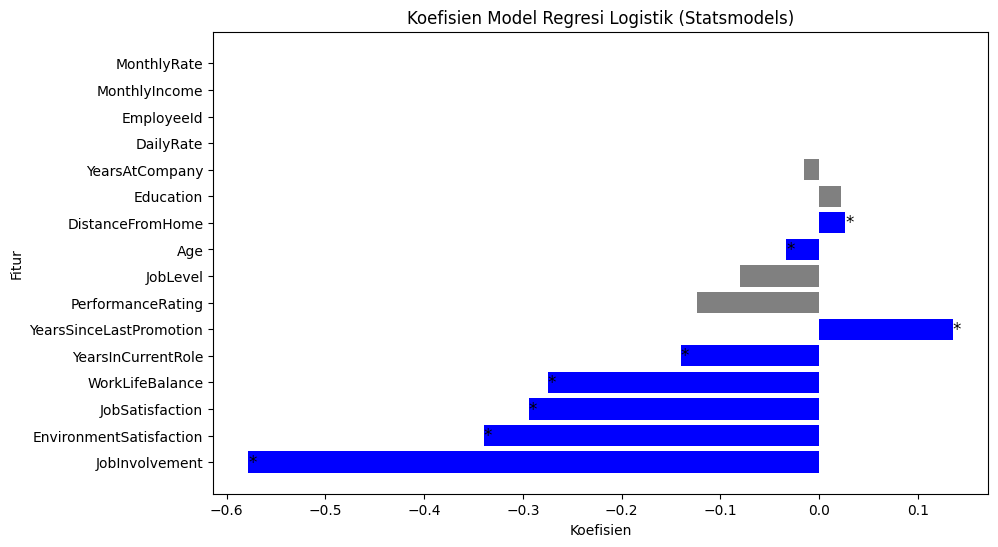

In [19]:
# Mendapatkan koefisien dan p-value dari hasil model
coefficients = result.params
p_values = result.pvalues

# Membuat DataFrame untuk visualisasi
coef_df = pd.DataFrame({'Koefisien': coefficients, 'P-value': p_values})
coef_df = coef_df.drop('const')  # Menghapus baris 'const' (intercept)

# Mengurutkan berdasarkan nilai absolut koefisien
coef_df = coef_df.sort_values(by='Koefisien', key=abs, ascending=False)


# Membuat bar chart horizontal untuk koefisien
plt.figure(figsize=(10, 6))
plt.barh(coef_df.index, coef_df['Koefisien'], color=np.where(coef_df['P-value'] < 0.05, 'blue', 'gray'))
plt.title('Koefisien Model Regresi Logistik (Statsmodels)')
plt.xlabel('Koefisien')
plt.ylabel('Fitur')

# Menambahkan tanda bintang untuk koefisien yang signifikan
for i, v in enumerate(coef_df['Koefisien']):
    if coef_df['P-value'][i] < 0.05:
        plt.text(v, i, '*', color='black', ha='left', va='center', fontsize=12)

plt.show()

**Interpretasi Hasil**

Variabel signifikan negatif (mencegah attrition):
JobInvolvement: Koefisien negatif besar (sekitar -0.58), artinya semakin tinggi keterlibatan kerja, semakin kecil kemungkinan karyawan keluar.

Environment Satisfaction, Job Satisfaction, Work Life Balance, Years In CurrentRole, Age: Semua ini memiliki efek negatif terhadap attrition — artinya, kepuasan, keseimbangan hidup-kerja, dan senioritas mengurangi risiko keluar.

Variabel signifikan positif (meningkatkan attrition):
Distance FromHome: Semakin jauh jarak ke kantor, semakin besar kemungkinan karyawan keluar.

Years Since Last Promotion: Semakin lama tidak dipromosikan, semakin tinggi kemungkinan keluar.

Variabel tidak signifikan (abu-abu):
MonthlyIncome, MonthlyRate, DailyRate, EmployeeId, Education, PerformanceRating, JobLevel, YearsAtCompany
→ Semua ini tidak terbukti punya pengaruh yang berarti terhadap attrition, meskipun secara umum sering dianggap relevan.

**Makna Visualisasi**

Visualisasi ini memperkuat kesimpulan sebelumnya bahwa faktor-faktor psikologis dan keterlibatan kerja lebih penting daripada faktor finansial seperti gaji.

Variabel yang secara signifikan memengaruhi attrition dapat menjadi target intervensi HR, seperti:

Meningkatkan kepuasan kerja dan keterlibatan.

Memperhatikan promosi tepat waktu.

Mengelola keseimbangan kerja–hidup karyawan.

#4. Evaluasi model
Pada tahap ini model dan hasil yang sudah dibuat sebelumnya akan dievaluasi tingkat akurasi dari hasil tersebut.

Model telah dibangun dengan Regresi Logistik, nilai koefisien akan memprediksi kemungkinan terjadinya attrition. Namun model dan nilai koefisien perlu dievaluasi.

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Pilih kolom dengan tipe data int dan 'Attrition'
numerical_cols = new_df_cleaned.select_dtypes(include=['int64', 'float64']).columns
X = new_df_cleaned[numerical_cols.drop('Attrition')]  # Drop 'Attrition' dari variabel X
y = new_df_cleaned['Attrition']

# Bagi data menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model regresi logistik
model = LogisticRegression()

# Latih model
model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = model.predict(X_test)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Tampilkan laporan klasifikasi dan confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8160377358490566
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       173
         1.0       0.00      0.00      0.00        39

    accuracy                           0.82       212
   macro avg       0.41      0.50      0.45       212
weighted avg       0.67      0.82      0.73       212

[[173   0]
 [ 39   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

**Penjelasan**
Walaupun model memiliki akurasi tinggi 81%. Namun Model ini gagal dalam mendeteksi karyawan yang akan keluar, meskipun akurasinya tampak tinggi. Anda perlu menangani ketidakseimbangan data agar model menjadi benar-benar berguna untuk prediksi attrition.

Hal ini mungkin dikarenakan regresi logistik menilai kemungkinan dari suatu faktor y.

In [25]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10) #Removed extra indentation
knn.fit(X_train, y_train)

model = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [26]:
    # Random Forest
    # Impor library yang dibutuhkan
    from sklearn.ensemble import RandomForestRegressor

    # buat model prediksi
    RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
    RF.fit(X_train, y_train)

    models = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

In [27]:
    #Boosting

    from sklearn.ensemble import AdaBoostRegressor

    boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
    boosting.fit(X_train, y_train)
    models = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [28]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

train      test
KNN       0.000121  0.000154
RF         0.00002  0.000137
Boosting  0.000116  0.000131

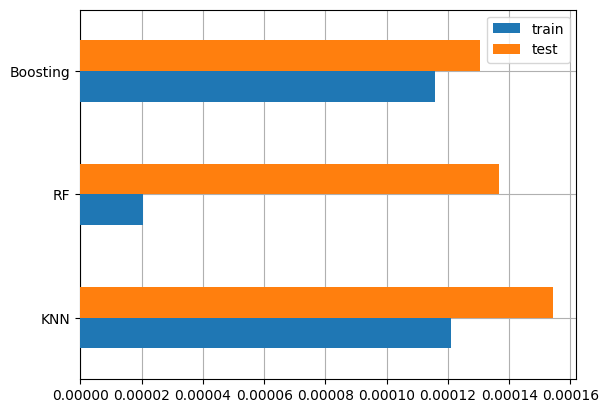

In [29]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Penjelasan:

KNN: Sangat lambat saat prediksi (test), karena menghitung jarak ke semua data latih.

Boosting: Berat di dua sisi — butuh waktu lama saat pelatihan dan prediksi.

Random Forest: Cepat saat train, tapi agak lambat saat prediksi dalam visualisasi ini.

Trade-off yang ditampilkan: kecepatan vs kompleksitas dari masing-masing algoritma.

#5. Kesimpulan

Proyek ini menjelaskan faktor apa yang menyebabkan attrition karyawan. Hasil model ini mengindikasikan bahwa faktor yang menyebabkan karyawan keluar / attrition adalah:

JobInvolvement: Koefisien negatif besar semakin kecil kemungkinan karyawan keluar.

Environment Satisfaction, Job Satisfaction, Work Life Balance, Years In CurrentRole, Age: Semua ini memiliki efek negatif terhadap attrition — artinya, kepuasan, keseimbangan hidup-kerja, dan senioritas mengurangi risiko keluar.

Variabel signifikan positif (meningkatkan attrition): Distance From Home: Semakin jauh jarak ke kantor, semakin besar kemungkinan karyawan keluar.

Years Since Last Promotion: Semakin lama tidak dipromosikan, semakin tinggi kemungkinan keluar.

In [30]:
!pip freeze > requirements.txt